Actividad Semanal -- 4

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

10 Octubre 2022

	Parte 1. Ejerciicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 






In [129]:
import pandas as pd
import numpy as np

In [130]:
#df contiene nuestro dataframe original
df = pd.read_csv('default of credit card clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Verificar si existen datos vacios:

In [131]:
df.isnull().values.any()

True

In [132]:
#Ejemplo de como se ven estos renglones con datos nulos en el dataframe (ID 19, columnas X12,....X17)
df.loc[18:22 , 'X10':'X19']

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
ID,,,,,,,,,,
18,-1.0,-1.0,253286.0,246536.0,194663.0,70074.0,5856.0,195599.0,10358.0,10000.0
19,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
20,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,-1.0,38358.0,27688.0,24489.0,20616.0,11802.0,930.0,3000.0,1537.0
22,-1.0,-1.0,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0


Aqui se observa, que el problema de datos nulos existe en todas las columnas

In [133]:
#Verificamos cuales columnas son aquellas que contienen renglones vacios
df.isnull().any()
#df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Como primer paso de limpieza del dataframe, vamos a eliminar las 2 columnas que no se consideran relevantes para el estudio:

    X2: Gender (1 = male; 2 = female)
    X4: Marital status (1 = married; 2 = single; 3 = others)

In [134]:
#Este dataframe, ya no contiene las columnas irrelevantes
df_without_X2_X4 = df.drop(['X2', 'X4',], axis = 1)
df_without_X2_X4.head()

,X1,X3,X5,X6,X7,X8,X9,X10,X11,X12,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Vamos a renombrar las columnas a sus nombres explicados en el .txt, para entender mejor que numero estamos leyendo durante las siguientes fases

In [135]:
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X1":"Amount of the given credit"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X3":"Education"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X5":"Age"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X6":"Repayment September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X7":"Repayment August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X8":"Repayment July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X9":"Repayment June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X10":"Repayment May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X11":"Repayment April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X12":"Bill September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X13":"Bill August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X14":"Bill July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X15":"Bill June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X16":"Bill May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X17":"Bill April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X18":"amount paid  September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X19":"amount paid  August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X20":"amount paid  July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X21":"amount paid  June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X22":"amount paid  May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X23":"amount paid  April, 2005"})
df_without_X2_X4

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Seleccionando la mejor técnicas para manejar los datos faltantes

Como segundo paso de limpieza, vamos a eliminar renglones con datos vacios, como el ejemplo arriba mostrado donde el ID 19, no contenia datos en las columnas X12-X17.
Una vez que eliminemos esos renglones, veremos que tanto se reduce nuestro dataframe, para asi tomar una decision de que técnica para manejo de datos faltantes utilizaremos.

In [136]:
#Dropping rows with NaN values on some column (at least 1)
df_no_empty_rows = df_without_X2_X4.dropna()
df_no_empty_rows

#OPCIONAL En caso de querer definir un threshold
#df_no_empty_rows_with_threshold.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
#df_no_empty_rows_with_threshold # in case of column  add   axis=1 

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [137]:
#We see that instead of 3000 rows (original dataframe) we only have now 29,958 rows on this new dataframe
#Este dataframe elimina el renglon completo si es que alguna de las variables (X) es nula
# Solamente 42 de 3000 renglones (1.4%) se pierden al utilizar la técnica de Eliminación por lista.
df_no_empty_rows.shape


(29958, 22)

Este sera nuestro dataframe para el ejercicio de la Semana 4:

In [138]:
df_eliminacion_por_lista = df_no_empty_rows
#df_eliminacion_por_lista.index.name = None
df_eliminacion_por_lista

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


!!!!!!!!!!!!!!!!!!!!!!!!!! Primero que nada, debemos de normalizar todos nuestros datos !!!!!!!!!!!!!!!!!!!!!!!!!!

In [139]:
# Using Sklearn & MinMax Scalar.
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df_normalized.iloc[:,0:] = scaler.fit_transform(df_normalized.iloc[:,0:].to_numpy())
df_normalized

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.137363,0.185849,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,-0.642497,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
2,-0.366561,0.185849,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,-0.659205,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
3,-0.597802,0.185849,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.298738,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
4,-0.906122,0.185849,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.057797,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
5,-0.906122,0.185849,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.578648,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404240,1.450938,0.381647,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,1.869050,...,0.694875,-0.149477,-0.384512,0.171131,0.610450,-0.012796,-0.113733,0.012988,-0.237269,-0.532853
29997,-0.135321,1.450938,0.815761,-0.874468,-0.723367,-0.696680,-0.666630,0.235635,0.253701,-0.672765,...,-0.532915,-0.577704,-0.652714,-0.231017,-0.104084,0.213973,-0.299878,-0.314124,-0.293485,-0.532853
29998,-1.060283,0.185849,0.164590,3.574048,2.617900,1.811669,-0.666630,0.235635,0.253701,-0.647220,...,-0.348043,-0.324651,-0.327833,-0.341890,-0.257018,0.952008,-0.040181,-0.183279,-0.119217,1.876689


# Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [140]:
df_normalized.shape

(29958, 22)

For each clientID, the data include 21 numerical variables, and we are interested in reducing this dimension.

In [160]:
import numpy as np
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(df_normalized.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df = pcsSummary_df.round(4)
pd.set_option('display.max_columns', None)
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,2.5592,2.0478,1.2300,1.0827,0.9914,0.9538,0.9416,0.9373,0.9276,0.8841,0.8558,0.7895,0.7276,0.6310,0.5095,0.4993,0.4346,0.3632,0.2649,0.2019,0.1590,0.1524
Proportion of variance,0.2977,0.1906,0.0688,0.0533,0.0447,0.0414,0.0403,0.0399,0.0391,0.0355,0.0333,0.0283,0.0241,0.0181,0.0118,0.0113,0.0086,0.0060,0.0032,0.0019,0.0011,0.0011
Cumulative proportion,0.2977,0.4883,0.5571,0.6104,0.6550,0.6964,0.7367,0.7766,0.8157,0.8513,0.8845,0.9129,0.9369,0.9550,0.9668,0.9782,0.9868,0.9928,0.9959,0.9978,0.9989,1.0000


In [162]:
#To display how much components do we need to explain more than 90% of variance

#12 Principal components are needed
pcsSummary_df.iloc[2,11]

0.9129

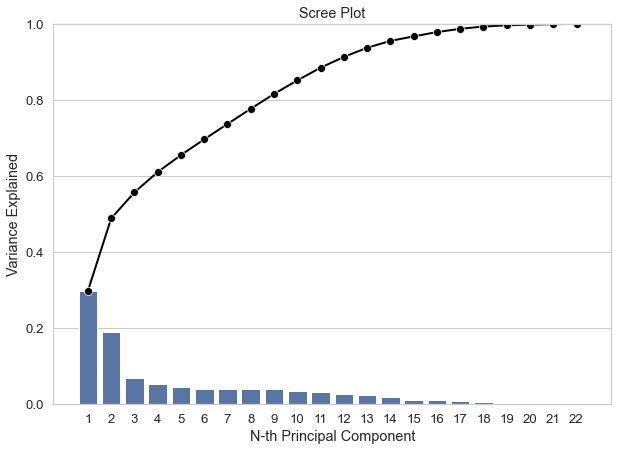

In [143]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


CONCLUSION:
Necesitamos al menos 12 componentes para explicar mas del 90% de la varianza de la coleccion de datos.

# Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [163]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_eliminacion_por_lista.columns
                                )
pcsComponents_df.iloc[:,:12].head()
#pcsComponents_df.sort_values(by='PC2', inplace=False, ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Amount of the given credit,0.065741,0.311212,0.060862,-0.060114,-0.258422,-0.121035,-0.036740,-0.231198,0.296412,-0.025518,0.023975,-0.047281
Education,0.019696,-0.090964,-0.098873,0.694851,0.288275,-0.050894,0.067280,0.219034,-0.411518,0.086262,0.012323,-0.192005
Age,0.013255,0.058567,-0.069256,0.696492,-0.258183,-0.057312,-0.018903,-0.294221,0.476223,-0.079865,-0.007484,0.144394
"Repayment September, 2005",0.164442,-0.297338,-0.001331,0.015185,-0.231626,0.081687,-0.026349,0.083946,-0.125457,0.001267,-0.007849,0.535195
"Repayment August, 2005",0.197133,-0.328590,0.047176,0.005105,-0.097171,-0.050174,0.007110,0.021402,-0.066960,0.008735,0.000986,0.414084


Procedemos a hacer el sort by los primeros 3 componentes principales, en base a los valores absolutos del dataframe, para conocer que variables son las mas importantes

In [145]:
df_sorted_PC1 = pcsComponents_df.abs()
df_sorted_PC1.sort_values(by='PC1',ascending=0).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
"Bill June, 2005",0.352382,0.148981,0.119168,0.016899,0.046707,0.082145,0.046253,0.017164,0.017724,0.124638,...,0.054460,0.004674,0.046603,0.202553,0.040979,0.008822,0.521565,0.488404,0.363628,0.345227
"Bill May, 2005",0.350298,0.147099,0.100282,0.024926,0.022018,0.089409,0.105026,0.064957,0.041524,0.003414,...,0.064728,0.047997,0.023518,0.410570,0.057060,0.016615,0.068368,0.249992,0.718677,0.225737
"Bill July, 2005",0.348244,0.149785,0.132582,0.002610,0.056076,0.034822,0.131904,0.103112,0.001889,0.118648,...,0.044903,0.036299,0.014237,0.111616,0.038999,0.017735,0.483446,0.497274,0.084951,0.526062
"Bill August, 2005",0.344285,0.143974,0.194659,0.010889,0.026543,0.010102,0.080534,0.000538,0.066630,0.031857,...,0.032800,0.050011,0.014658,0.372098,0.051091,0.000850,0.040184,0.343279,0.328539,0.646764
"Bill April, 2005",0.343094,0.145099,0.090346,0.027989,0.024538,0.015362,0.166319,0.088007,0.022706,0.016971,...,0.081684,0.066250,0.003170,0.479384,0.046818,0.024472,0.513927,0.338325,0.426603,0.071117


In [146]:
df_sorted_PC2 = pcsComponents_df.abs()
df_sorted_PC2.sort_values(by='PC2',ascending=0).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
"Repayment July, 2005",0.203179,0.335465,0.102819,0.006430,0.005447,0.085740,0.011158,0.041213,0.027238,0.026860,...,0.092935,0.528160,0.097753,0.158787,0.606392,0.306564,0.025151,0.027904,0.008452,0.004802
"Repayment June, 2005",0.209882,0.335010,0.140283,0.014635,0.079583,0.112254,0.021152,0.068960,0.135006,0.064664,...,0.061095,0.177287,0.587213,0.058629,0.225629,0.567568,0.019172,0.001798,0.014032,0.001435
"Repayment August, 2005",0.197133,0.328590,0.047176,0.005105,0.097171,0.050174,0.007110,0.021402,0.066960,0.008735,...,0.101015,0.284632,0.558265,0.057059,0.485299,0.140050,0.031298,0.012907,0.003333,0.000038
"Repayment May, 2005",0.213607,0.321757,0.159907,0.027774,0.115867,0.084175,0.005308,0.105338,0.187082,0.056726,...,0.014306,0.166316,0.082748,0.143053,0.386119,0.674039,0.027049,0.023414,0.008276,0.000592
Amount of the given credit,0.065741,0.311212,0.060862,0.060114,0.258422,0.121035,0.036740,0.231198,0.296412,0.025518,...,0.813048,0.016781,0.042689,0.019990,0.006953,0.006820,0.009506,0.014384,0.000704,0.002900


In [147]:
df_sorted_PC3 = pcsComponents_df.abs()
df_sorted_PC3.sort_values(by='PC3',ascending=0).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
"amount paid August, 2005",0.077383,0.139041,0.430071,0.091342,0.156487,0.226548,0.250150,0.363716,0.171296,0.280524,...,0.010849,0.037169,0.033098,0.032720,0.045875,0.021941,0.146656,0.070844,0.037866,0.124416
"amount paid September, 2005",0.092745,0.149114,0.394769,0.074848,0.195387,0.227500,0.290574,0.022084,0.012127,0.236973,...,0.008194,0.084505,0.051920,0.045338,0.065169,0.018719,0.043403,0.067377,0.044481,0.084682
"amount paid July, 2005",0.085010,0.150402,0.392259,0.066044,0.033910,0.307811,0.185777,0.074849,0.036211,0.782440,...,0.022559,0.074160,0.049742,0.127049,0.028224,0.050769,0.001152,0.123525,0.026527,0.063064
"amount paid June, 2005",0.076508,0.140268,0.333816,0.036243,0.096884,0.085196,0.633623,0.309379,0.342200,0.423775,...,0.042698,0.038024,0.052129,0.123035,0.023794,0.048223,0.111846,0.002550,0.081273,0.041963
"amount paid April, 2005",0.068753,0.128451,0.292864,0.030255,0.180521,0.431436,0.506466,0.347137,0.466251,0.119810,...,0.154339,0.036468,0.004566,0.092281,0.005168,0.000427,0.034730,0.027350,0.017259,0.008279


CONCLUSIONt: 
* El 1er componente principal, esta dominado por "Bill June, 2005": 
  * Tiene un peso de 0.352382. 

* El 2d0 componente principal, esta dominado por "Repayment July, 2005". 

* El 3er componente principal, esta dominado por "Amount paid August, 2005". 

Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

######################## ESTO TE TOCA A TI JAVIER########################

#    Parte 2.  Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?

    Se necesitan al menos 12 componentes para explicar mas del 90% de la varianza del dataset, por ende 12 seria el numero minimo de componetes a utilizar para crear algun modelo.

¿Cuál es la variación de los datos que representan esos componentes?
    
    El 91.29% de varianza es explicada con 12 componentes.

¿Cuál es la pérdida de información después de realizar PCA?

    Al utilizar 12 componentes, se perderia 100 - 91.29 = 8.71% de la información.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

    ######################## ESTO TE TOCA A TI JAVIER ########################

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

    ######################## ESTO TE TOCA A TI JAVIER ########################